# Dimensionality Reduction Plots

We'll perform a dimensionality reduction technique to plot the observations in 2 dimensions.

We'll use two techniques:

* **Principal Component Analysis**: this technique relies on the obtention of the eigenvalues and eigenvectors of the data matrix and tries to provide a minimum number of variables that keep the maximum amount of variance.
* **t-SNE**: the t-distributed Stochastic Neighbour Embedding is a probabilistic technique particularly well suited for the visualization of high-dimensional datasets. It minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.





In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

Let's get the features and labels and plot them:

In [2]:
# Dataframe
path_df = "pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

We'll unify training and test sets. The initial shapes are:

In [3]:
print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(167, 300)
(30, 300)
(167,)
(30,)


Let's do the concatenation:

In [4]:
features = np.concatenate((features_train,features_test), axis=0)
labels = np.concatenate((labels_train,labels_test), axis=0)

And check the shapes are correct:

In [5]:
print(features.shape)
print(labels.shape)

(197, 300)
(197,)


We'll define a function that comprises the whole visualization process:

In [14]:
def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Get labels name
    category_names = {
        "1": 'first',
        "2": 'second',
        "3": 'third'
    }

    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    palette=["lightseagreen","red", "royalblue"],
                    alpha=.7).set_title(title);

## Dimensionality reduction with PCA

Let's plot the PCA model result:

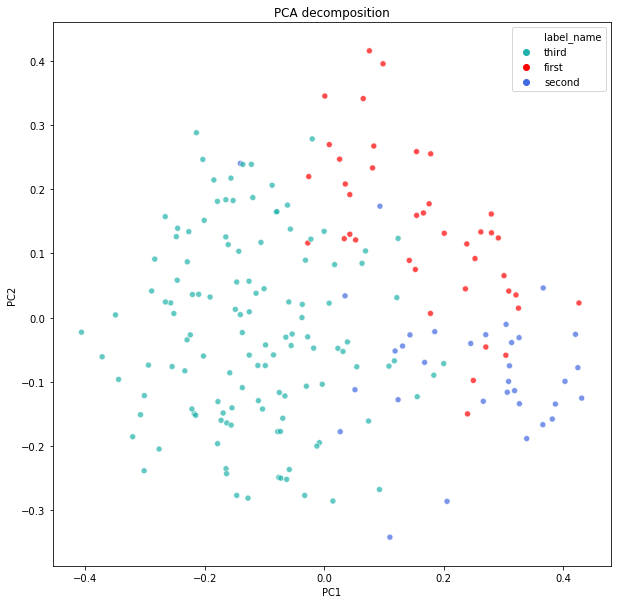

In [15]:
plot_dim_red("PCA", 
             features=features, 
             labels=labels,
             n_components=2)

## Dimensionality Reduction with t-SNE

Let's plot the t-SNE model result:

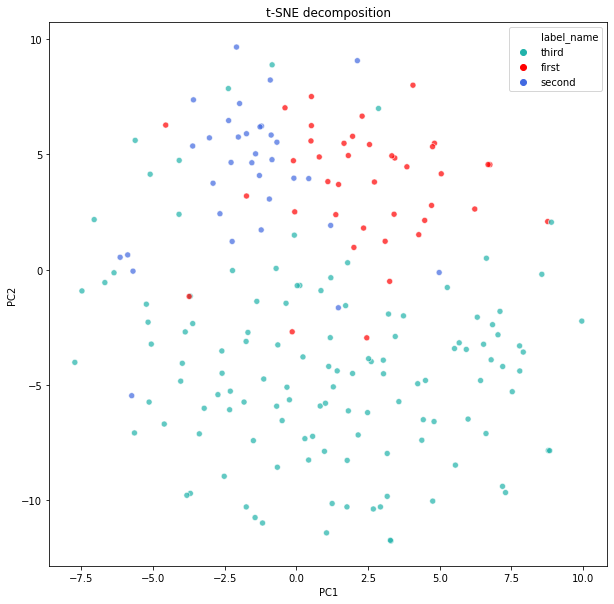

In [16]:
plot_dim_red("TSNE", 
             features=features, 
             labels=labels,
             n_components=2)

We can see that the t-SNE decomposition works much better on our data.